In [1]:
import numpy as ny
import pandas as ps
import seaborn as sc

In [84]:
DF=ps.read_table(r"https://reneshbedre.github.io/myfiles/anova/onewayanova.txt")

In [85]:
DF

,A,B,C,D
0,25,45,30,54
1,30,55,29,60
2,28,29,33,51
3,36,56,37,62
4,29,40,27,73


In [24]:
DF.iloc[0:2,0:]

,A,B,C,D
0,25,45,30,54
1,30,55,29,60


In [41]:
DF=ps.read_csv(r"https://reneshbedre.github.io/myfiles/anova/onewayanova.txt",sep="\t")

In [60]:
DF=DF.rename(columns={"A":"Age","B":"Weight","C":"Run","D":"Run"})

In [39]:
DF=DF.rename(index={2:1,"B":"Weight","C":"Height","D":"Run"})

In [44]:
DF.shape

(5, 4)

In [46]:
DF.describe()

,Age,Weight,Run,Run
count,5.000000,5.000000,5.000000,5.000000
mean,29.600000,45.000000,31.200000,60.000000
std,4.037326,11.202678,3.898718,8.514693
min,25.000000,29.000000,27.000000,51.000000
25%,28.000000,40.000000,29.000000,54.000000
50%,29.000000,45.000000,30.000000,60.000000
75%,30.000000,55.000000,33.000000,62.000000
max,36.000000,56.000000,37.000000,73.000000


In [49]:
DF.select_dtypes(exclude="int64")

""
0
1
2
3
4


In [51]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
Age       5 non-null int64
Weight    5 non-null int64
Run       5 non-null int64
Run       5 non-null int64
dtypes: int64(4)
memory usage: 288.0 bytes


In [57]:
DF.Age

0    25
1    30
2    28
3    36
4    29
Name: Age, dtype: int64

In [64]:
DF[["Age"]]

,Age
0,25
1,30
2,28
3,36
4,29


In [69]:
DF.Age.nunique()

5

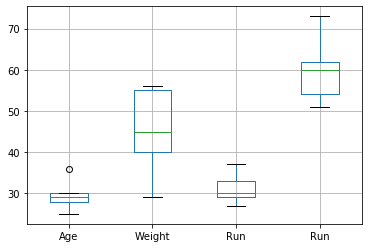

In [70]:
DF.boxplot()

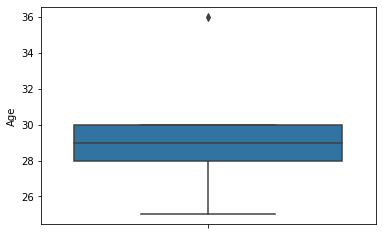

In [76]:
sc.boxplot(DF.Age,orient="v")

In [88]:
DF[["A"]]

,A
0,25
1,30
2,28
3,36
4,29


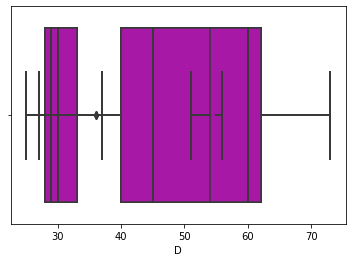

In [98]:
sg=["g","k","b","c","m"]
for j in sg:
    for i in DF.columns:
    
        sc.boxplot(DF[i],color=j)
        

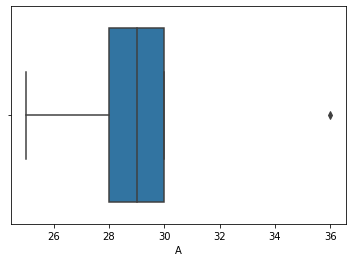

In [91]:
sc.boxplot(DF.A)

In [99]:
import scipy.stats as ss
from statsmodels.formula.api import ols

In [117]:
fvalue,pvalue=ss.f_oneway(DF["A"],DF["B"],DF["C"],DF["D"])

In [121]:
pvalue

2.639241146210922e-05

In [122]:
2.639241146210922 *(2.14**-5)

0.05880445192415697

In [124]:
DF=ps.read_csv(r"https://raw.githubusercontent.com/RoyMachineLearning/Suicide-Rates-Overview-1985-to-2016/master/master.csv")

In [131]:
DF.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [132]:
DF.shape

(27820, 12)

In [133]:
DF.select_dtypes(exclude="int64")

,country,sex,age,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),generation
0,Albania,male,15-24 years,6.71,Albania1987,NaN,"2,156,624,900",Generation X
1,Albania,male,35-54 years,5.19,Albania1987,NaN,"2,156,624,900",Silent
2,Albania,female,15-24 years,4.83,Albania1987,NaN,"2,156,624,900",Generation X
3,Albania,male,75+ years,4.59,Albania1987,NaN,"2,156,624,900",G.I. Generation
4,Albania,male,25-34 years,3.28,Albania1987,NaN,"2,156,624,900",Boomers
...,...,...,...,...,...,...,...,...
27815,Uzbekistan,female,35-54 years,2.96,Uzbekistan2014,0.675,"63,067,077,179",Generation X
27816,Uzbekistan,female,75+ years,2.58,Uzbekistan2014,0.675,"63,067,077,179",Silent
27817,Uzbekistan,male,5-14 years,2.17,Uzbekistan2014,0.675,"63,067,077,179",Generation Z
27818,Uzbekistan,female,5-14 years,1.67,Uzbekistan2014,0.675,"63,067,077,179",Generation Z


In [178]:
di={}
for i in DF.country.unique():
    di[i]=len(DF[DF["country"]==i])
di["Italy"]

372

In [173]:
DF.country.value_counts()

Mauritius                 382
Netherlands               382
Austria                   382
Iceland                   382
Italy                     372
                         ... 
Bosnia and Herzegovina     24
Cabo Verde                 12
Dominica                   12
Macau                      12
Mongolia                   10
Name: country, Length: 101, dtype: int64

In [163]:
cv=DF.corr(method="pearson")
cv

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
year,1.000000,-0.004546,0.008850,-0.039037,0.366786,0.339134
suicides_no,-0.004546,1.000000,0.616162,0.306604,0.151399,0.061330
population,0.008850,0.616162,1.000000,0.008285,0.102943,0.081510
suicides/100k pop,-0.039037,0.306604,0.008285,1.000000,0.074279,0.001785
HDI for year,0.366786,0.151399,0.102943,0.074279,1.000000,0.771228
gdp_per_capita ($),0.339134,0.061330,0.081510,0.001785,0.771228,1.000000


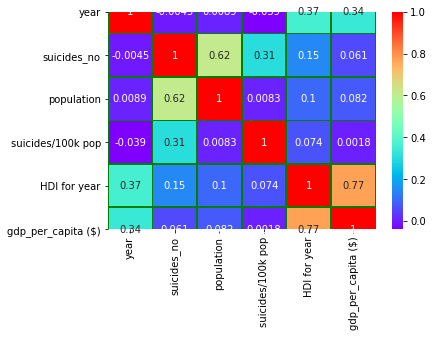

In [169]:
sc.heatmap(cv,annot=True,cmap="rainbow",linewidths=0.9,linecolor="g")